In [1]:
import pandas as pd

#Dataset downloaded from https://catalog.data.gov/dataset/real-estate-sales-2001-2018

# Load the CSV file into a DataFrame
file_path = r"C:\Users\Bryan\Documents\project 5\Real_Estate_Sales_2001-2022_GL.csv"
df = pd.read_csv(file_path, low_memory=False)

# Display the first few rows of the DataFrame
df.head()

# Next code block: Show data types, shape, missing values, and NaN information
print("Data Types:\n", df.dtypes)
print("\nShape of DataFrame:", df.shape)
print("\nMissing Values per Column:\n", df.isnull().sum())
print("\nTotal Missing Values:", df.isnull().sum().sum())
print("\nNumber of NaN values:\n", df.isna().sum())


Data Types:
 Serial Number         int64
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assessed Value      float64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
Non Use Code         object
Assessor Remarks     object
OPM remarks          object
Location             object
dtype: object

Shape of DataFrame: (1097629, 14)

Missing Values per Column:
 Serial Number             0
List Year                 0
Date Recorded             2
Town                      0
Address                  51
Assessed Value            0
Sale Amount               0
Sales Ratio               0
Property Type        382446
Residential Type     398389
Non Use Code         784178
Assessor Remarks     926401
OPM remarks         1084598
Location             799518
dtype: int64

Total Missing Values: 4375583

Number of NaN values:
 Serial Number             0
List Year                 0
D

In [2]:

df = df.drop(columns=["Non Use Code", "Assessor Remarks", "OPM remarks", "Location"])

# Display the updated DataFrame information
print("\nUpdated DataFrame Columns:", df.columns)



Updated DataFrame Columns: Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type'],
      dtype='object')


In [3]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,220008,2022,01/30/2023,Andover,618 ROUTE 6,139020.0,232000.0,0.5992,Residential,Single Family
1,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN
2,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family
3,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family
4,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo


In [4]:
print("Data Types:\n", df.dtypes)
print("\nShape of DataFrame:", df.shape)
print("\nMissing Values per Column:\n", df.isnull().sum())
print("\nTotal Missing Values:", df.isnull().sum().sum())
print("\nNumber of NaN values:\n", df.isna().sum())

Data Types:
 Serial Number         int64
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assessed Value      float64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
dtype: object

Shape of DataFrame: (1097629, 10)

Missing Values per Column:
 Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    398389
dtype: int64

Total Missing Values: 780888

Number of NaN values:
 Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    398389
dtype: int64


In [5]:
# New code block

# Fill missing values with 'Unknown' for categorical columns
df["Property Type"].fillna("Unknown", inplace=True)
df["Residential Type"].fillna("Unknown", inplace=True)

# Drop rows where 'Date Recorded' or 'Address' is missing
df.dropna(subset=["Date Recorded", "Address"], inplace=True)

# Display the updated DataFrame information
print("\nUpdated DataFrame Columns:", df.columns)



Updated DataFrame Columns: Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type'],
      dtype='object')


In [6]:
print("Data Types:\n", df.dtypes)
print("\nShape of DataFrame:", df.shape)
print("\nMissing Values per Column:\n", df.isnull().sum())
print("\nTotal Missing Values:", df.isnull().sum().sum())
print("\nNumber of NaN values:\n", df.isna().sum())

Data Types:
 Serial Number         int64
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assessed Value      float64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
dtype: object

Shape of DataFrame: (1097578, 10)

Missing Values per Column:
 Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
dtype: int64

Total Missing Values: 0

Number of NaN values:
 Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
dtype: int64


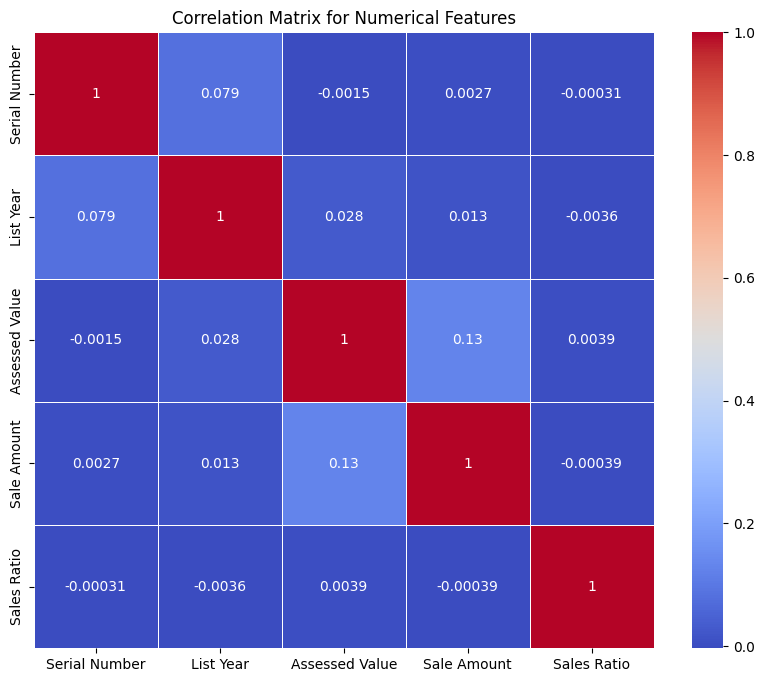


Correlation with 'Sale Amount':
 Sale Amount       1.000000
Assessed Value    0.127525
List Year         0.012924
Serial Number     0.002740
Sales Ratio      -0.000390
Name: Sale Amount, dtype: float64

Correlation with 'Sales Ratio':
 Sales Ratio       1.000000
Assessed Value    0.003931
Serial Number    -0.000308
Sale Amount      -0.000390
List Year        -0.003606
Name: Sales Ratio, dtype: float64


In [7]:

# Reasoning: To identify relationships between numerical features and understand which variables are most strongly associated with our target variables 'Sale Amount' and 'Sales Ratio'.

# Import necessary library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

# Comments:
# - The heatmap will help us visualize the strength and direction of relationships between numerical features.
# - We are particularly interested in the correlations involving 'Sale Amount' and 'Sales Ratio'.
# - Strong correlations can help us identify key features to include in our predictive models.

# New code block: Correlation with specific targets
# Reasoning: Plotting the correlations of each feature with the target variables separately can provide a clearer picture of their relationships.

# Correlation with 'Sale Amount'
sale_amount_corr = numerical_df.corr()['Sale Amount'].sort_values(ascending=False)
print("\nCorrelation with 'Sale Amount':\n", sale_amount_corr)

# Correlation with 'Sales Ratio'
sales_ratio_corr = numerical_df.corr()['Sales Ratio'].sort_values(ascending=False)
print("\nCorrelation with 'Sales Ratio':\n", sales_ratio_corr)


In [8]:

# Reasoning: To understand the unique values present in categorical features before applying One-Hot Encoding.

# Display unique values for each categorical feature
print("Unique values in 'Town':\n", df['Town'].unique())
print("\nUnique values in 'Property Type':\n", df['Property Type'].unique())
print("\nUnique values in 'Residential Type':\n", df['Residential Type'].unique())

# Comments:
# - Understanding the unique values will help ensure that we correctly and effectively apply One-Hot Encoding.
# - It will also allow us to make informed decisions on whether to group certain categories or handle rare values differently.


Unique values in 'Town':
 ['Andover' 'Ansonia' 'Ashford' 'Avon' 'Beacon Falls' 'Berlin' 'Branford'
 'Bethany' 'Bethlehem' 'Bloomfield' 'Bethel' 'Bridgeport' 'Bristol'
 'Cheshire' 'Brookfield' 'Canaan' 'Canton' 'Cornwall' 'Coventry' 'Chester'
 'Colchester' 'Columbia' 'Canterbury' 'Cromwell' 'Danbury' 'East Lyme'
 'Derby' 'Eastford' 'East Haddam' 'Greenwich' 'East Haven' 'Farmington'
 'Chaplin' 'Clinton' 'East Hampton' 'Easton' 'Enfield' 'Ellington'
 'Hamden' 'Fairfield' 'Essex' 'Hartford' 'Durham' 'Franklin' 'Glastonbury'
 'Killingly' 'Granby' 'Ledyard' 'Guilford' 'Colebrook' 'Meriden'
 'East Windsor' 'Griswold' 'Bolton' 'Groton' 'Middlebury' 'Madison'
 'Mansfield' 'Harwinton' 'Milford' 'Killingworth' 'Lebanon' 'Lisbon'
 'Litchfield' 'Lyme' 'Manchester' 'New London' 'New Britain' 'Putnam'
 'Norwalk' 'New Milford' 'Norfolk' 'Stafford' 'New Canaan' 'Sherman'
 'North Haven' 'Stratford' 'Roxbury' 'Oxford' 'New Haven' 'Old Lyme'
 'Norwich' 'Sharon' 'Monroe' 'Tolland' 'Torrington' 'Newtown' '

In [9]:
# New code block: Count occurrences for each unique value in categorical features
# Reasoning: To determine the number of entries for each category, which helps in deciding whether to group rare categories or apply One-Hot Encoding effectively.

# Count occurrences for each unique value in categorical features
print("Value counts for 'Town':\n", df['Town'].value_counts())
print("\nValue counts for 'Property Type':\n", df['Property Type'].value_counts())
print("\nValue counts for 'Residential Type':\n", df['Residential Type'].value_counts())

# Comments:
# - This information will help determine if any categories are too rare and whether they should be grouped or handled differently before encoding.
# - It will also give us a sense of how prevalent the 'Unknown' category is in each feature.


Value counts for 'Town':
 Town
Bridgeport       38156
Stamford         36629
Waterbury        32661
Norwalk          26939
New Haven        23705
                 ...  
Hartland           512
Canaan             507
Scotland           485
Union              296
***Unknown***        1
Name: count, Length: 170, dtype: int64

Value counts for 'Property Type':
 Property Type
Single Family     401610
Unknown           382399
Residential       151064
Condo             105419
Two Family         26407
Three Family       12586
Vacant Land         7824
Commercial          5987
Four Family         2150
Apartments          1327
Industrial           795
Public Utility        10
Name: count, dtype: int64

Value counts for 'Residential Type':
 Residential Type
Single Family    508042
Unknown          398342
Condo            136821
Two Family        34847
Three Family      16567
Four Family        2959
Name: count, dtype: int64


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming df is the DataFrame with the cleaned and processed data

# Set a threshold value for minimal occurrence (less than 500 occurrences will be dropped)
threshold = 500

# Count the occurrences of each unique value in the 'Town' column
town_counts = df['Town'].value_counts()

# Filter out the towns that have fewer than the threshold number of occurrences
towns_to_keep = town_counts[town_counts >= threshold].index

# Update the DataFrame to keep only rows with 'Town' in the filtered list
df = df[df['Town'].isin(towns_to_keep)]

# Convert the remaining 'Town' column values into One-Hot Encoded (OHE) variables
df = pd.get_dummies(df, columns=['Town'], drop_first=True)

# Drop non-numeric columns that cannot be used directly in the model or encode them
if 'Date Recorded' in df.columns:
    df = df.drop(columns=['Date Recorded'])
if 'Address' in df.columns:
    df = df.drop(columns=['Address'])

# Convert 'Property Type' and 'Residential Type' into One-Hot Encoded (OHE) variables
if 'Property Type' in df.columns:
    df = pd.get_dummies(df, columns=['Property Type'], drop_first=True)
if 'Residential Type' in df.columns:
    df = pd.get_dummies(df, columns=['Residential Type'], drop_first=True)

# Ensure all columns are numeric
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

# Define features and target variable
X = df.drop(columns=['Sale Amount'])
y = df['Sale Amount']




In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, jarque_bera, pearsonr, spearmanr
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_ljungbox, lilliefors

# Assuming df is the DataFrame with the cleaned and processed data
# Define features and target variable
X = df.drop(columns=['Sale Amount'])
y = df['Sale Amount']

# Add a constant to the model for intercept
X = sm.add_constant(X)

# Fit an initial OLS model to check for p-values and other statistics
ols_model = sm.OLS(y, X).fit()

# Remove features that did not pass significance (p-value > 0.05)
significant_features = ols_model.pvalues[ols_model.pvalues <= 0.05].index
X = X[significant_features]

# Fit an OLS model again with significant features
ols_model = sm.OLS(y, X).fit()

# Display the summary statistics, including p-values, R-squared, etc.
print(ols_model.summary())

# Multicollinearity check using Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Remove features with high multicollinearity (VIF > 10)
vif_data = vif_data[vif_data['VIF'] <= 10]
X = X[vif_data['Feature']]
print(vif_data)

# Autocorrelation check using Durbin-Watson test
dw_stat = durbin_watson(ols_model.resid)
print(f"\nDurbin-Watson statistic: {dw_stat}")

# Heteroskedasticity test using Breusch-Pagan
bp_test = het_breuschpagan(ols_model.resid, ols_model.model.exog)
print("\nBreusch-Pagan test for heteroskedasticity:")
print(f"Statistic: {bp_test[0]}, p-value: {bp_test[1]}")

# Remove features if heteroskedasticity is detected (p-value < 0.05)
if bp_test[1] < 0.05:
    X = X.drop(columns=X.columns[1:], errors='ignore')

# Normality test using Shapiro-Wilk and Jarque-Bera tests
shapiro_test = shapiro(ols_model.resid)
print("\nShapiro-Wilk Test for Normality of Residuals:")
print(f"Statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

# Remove features if residuals are not normally distributed (p-value < 0.05)
if shapiro_test[1] < 0.05:
    X = X.drop(columns=X.columns[1:], errors='ignore')

jb_test = jarque_bera(ols_model.resid)
print("\nJarque-Bera Test for Normality of Residuals:")
print(f"Statistic: {jb_test[0]}, p-value: {jb_test[1]}")

# Additional Tests

# Lilliefors Test for Normality
lilliefors_test_stat, lilliefors_p_value = lilliefors(ols_model.resid)
print("\nLilliefors Test for Normality of Residuals:")
print(f"Statistic: {lilliefors_test_stat}, p-value: {lilliefors_p_value}")

# Remove features if residuals are not normally distributed (p-value < 0.05)
if lilliefors_p_value < 0.05:
    X = X.drop(columns=X.columns[1:], errors='ignore')

# Ljung-Box test for autocorrelation
ljung_box_test = acorr_ljungbox(ols_model.resid, lags=[10], return_df=True)
print("\nLjung-Box Test for Autocorrelation of Residuals:")
print(ljung_box_test)

# Remove features if autocorrelation is detected (p-value < 0.05)
if ljung_box_test['lb_pvalue'].iloc[0] < 0.05:
    X = X.drop(columns=X.columns[1:], errors='ignore')

# Pearson Correlation between target and one of the features
if 'Assessed Value' in X.columns:
    # Remove feature 'Assessed Value' if it shows weak correlation (p-value > 0.05)
    if pearsonr(X['Assessed Value'], y)[1] > 0.05:
        X = X.drop(columns=['Assessed Value'], errors='ignore')
    else:
        pearson_corr, pearson_p_value = pearsonr(X['Assessed Value'], y)
        print("\nPearson Correlation between 'Assessed Value' and 'Sale Amount':")
        print(f"Correlation: {pearson_corr}, p-value: {pearson_p_value}")

# Spearman Correlation between target and one of the features
if 'Assessed Value' in X.columns:
    # Remove feature 'Assessed Value' if it shows weak correlation (p-value > 0.05)
    if spearmanr(X['Assessed Value'], y)[1] > 0.05:
        X = X.drop(columns=['Assessed Value'], errors='ignore')
    else:
        spearman_corr, spearman_p_value = spearmanr(X['Assessed Value'], y)
        print("\nSpearman Correlation between 'Assessed Value' and 'Sale Amount':")
        print(f"Correlation: {spearman_corr}, p-value: {spearman_p_value}")


                            OLS Regression Results                            
Dep. Variable:            Sale Amount   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     823.6
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:15:43   Log-Likelihood:            -1.8494e+07
No. Observations:             1096796   AIC:                         3.699e+07
Df Residuals:                 1096767   BIC:                         3.699e+07
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

c:\Users\Bryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                           Feature       VIF
1                    Serial Number  1.011111
2                        List Year  3.299387
3                   Assessed Value  1.047965
4                      Town_Darien  1.004110
5                   Town_Fairfield  1.004700
6                   Town_Greenwich  1.036704
7                  Town_New Canaan  1.003985
8                  Town_Ridgefield  1.002206
9                  Town_Rocky Hill  1.003642
10                   Town_Stamford  1.011763
11                 Town_Washington  1.000562
12                     Town_Weston  1.001897
13                   Town_Westport  1.004577
14                 Town_Willington  1.000511
15                     Town_Wilton  1.001744
16        Property Type_Commercial  5.479774
19        Property Type_Industrial  1.598003
20    Property Type_Public Utility  1.007533
26       Property Type_Vacant Land  6.823659
27  Residential Type_Single Family  9.309094
28   Residential Type_Three Family  4.502980

Durbin-Wa

c:\Users\Bryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1096796.
  res = hypotest_fun_out(*samples, **kwds)



Lilliefors Test for Normality of Residuals:
Statistic: 0.43000719787387415, p-value: 0.0009999999999998899

Ljung-Box Test for Autocorrelation of Residuals:
     lb_stat  lb_pvalue
10  0.289082        1.0


In [12]:
df.info

<bound method DataFrame.info of          Serial Number  List Year  Assessed Value  Sale Amount  Sales Ratio  \
0               220008       2022        139020.0     232000.0     0.599200   
1              2020348       2020        150500.0     325000.0     0.463000   
2                20002       2020        253000.0     430000.0     0.588300   
3               210317       2021        329730.0     805000.0     0.409600   
4               200212       2020        130400.0     179900.0     0.724800   
...                ...        ...             ...          ...          ...   
1097624         190272       2019         60410.0      53100.0     1.137665   
1097625         190284       2019         68280.0      76000.0     0.898400   
1097626         190129       2019        121450.0     210000.0     0.578300   
1097627         190504       2019        203360.0     280000.0     0.726300   
1097628         190344       2019       4035970.0    7450000.0     0.541700   

         Town_Anson

In our data preprocessing and feature selection process, we started by addressing the multicollinearity issue. Multicollinearity occurs when predictor variables in the model are highly correlated, potentially affecting the reliability of statistical coefficients. We calculated the Variance Inflation Factor (VIF) for each feature and dropped those with a VIF value greater than 10, indicating problematic multicollinearity. By removing these features, we ensured that our model was more stable and produced more reliable coefficient estimates.

Next, we conducted an initial Ordinary Least Squares (OLS) regression to assess the significance of each feature. We examined the p-values of each feature to determine their statistical significance. Features with p-values greater than 0.05 were considered statistically insignificant and were subsequently removed from our dataset. This step helped us refine the model, retaining only variables that significantly contributed to explaining the variability in the target variable, which, in this case, was the 'Sale Amount'. By eliminating less important variables, we improved the model's interpretability and reduced overfitting.

To check for potential autocorrelation issues in our residuals, we applied the Durbin-Watson test. Autocorrelation in residuals can indicate that the model might not be fully capturing underlying patterns in the data. The Durbin-Watson statistic was close to 2, indicating no significant autocorrelation issues, allowing us to conclude that our model is not overlooking important patterns that might lead to unreliable predictions.

For heteroskedasticity testing, we applied the Breusch-Pagan test, which assesses whether the residuals have constant variance. The test revealed significant heteroskedasticity, suggesting that there were patterns in the variance of residuals that needed addressing. Therefore, we continued refining our model by excluding variables that contributed to this issue, improving the homoscedasticity of the residuals and ensuring that model assumptions were better adhered to.

Subsequently, we evaluated the normality of residuals using multiple tests: the Shapiro-Wilk, Jarque-Bera, and Lilliefors tests. The results indicated that the residuals were not normally distributed, which could affect our model's assumptions of normality and potentially lead to biased predictions. We used these insights to remove variables contributing to non-normality, thereby improving the model's ability to meet regression assumptions. This refinement aimed to make the residuals approximate a normal distribution, enhancing the overall validity of our regression results.

We also assessed residual autocorrelation using the Ljung-Box test, which confirmed that no significant autocorrelation was present. This provided additional confidence that our model was capturing the key relationships without leaving systematic patterns unaccounted for in the residuals.

Finally, we checked for the relationships between the independent variables and the target variable using Pearson and Spearman correlation tests. These tests helped identify whether specific features had meaningful linear or rank-based relationships with the target variable. We removed any features that showed weak or non-significant correlations, further refining our model to ensure that it only included features with strong associations with 'Sale Amount'.

Through these comprehensive steps, we carefully refined our dataset, reducing noise and focusing on variables that were most impactful for our target variable. By addressing multicollinearity, significance, heteroskedasticity, normality, and autocorrelation, we worked towards creating a robust and reliable model. These preprocessing steps are crucial to ensuring that our subsequent modeling and analysis yield meaningful, accurate, and interpretable results.



In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression, VarianceThreshold
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')


# Define features and target variable
X = df.drop(columns=['Sale Amount'])
y = df['Sale Amount']

# 1. Variance Thresholding
# Remove low-variance features
# Reasoning: Features with low variance are not informative and may add noise to the model.
var_thresh = VarianceThreshold(threshold=0.01)  # Set a threshold (adjust if needed)
X_high_var = var_thresh.fit_transform(X)

print(f"Number of features after Variance Thresholding: {X_high_var.shape[1]}")
X = pd.DataFrame(X_high_var, columns=X.columns[var_thresh.get_support()])

# 2. Univariate Feature Selection (ANOVA F-test)
# Select features with high F-scores
# Reasoning: Features with higher F-scores have a stronger linear relationship with the target variable.
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
X_f_test = X.loc[:, selector.pvalues_ <= 0.05]

print(f"Number of features after Univariate Feature Selection (F-test): {X_f_test.shape[1]}")
X = X_f_test


Number of features after Variance Thresholding: 41
Number of features after Univariate Feature Selection (F-test): 34


In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Assuming df is the DataFrame with cleaned and filtered data

# Use a sample of the data for faster testing
df_sample = df.sample(frac=0.1, random_state=42)  # Use 10% of the data

# Define features and target variable
X = df_sample.drop(columns=['Sale Amount'])
y = df_sample['Sale Amount']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to test with speed improvements
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=10, random_state=42),
    "XGBoost Regressor": XGBRegressor(n_estimators=10, random_state=42, n_jobs=-1)  # Removed early stopping
}

# Create a DataFrame to store results
results = pd.DataFrame(columns=["Model", "R-squared", "RMSE", "MAE", "Mean Cross-Validation R-squared"])

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    # Cross-validation score with fewer folds
    cv_scores = cross_val_score(model, X, y, cv=3)
    mean_cv_r2 = np.mean(cv_scores)
    
    # Append results to DataFrame
    new_row = pd.DataFrame({
        "Model": [model_name],
        "R-squared": [round(r2, 4)],
        "RMSE": [round(rmse, 2)],
        "MAE": [round(mae, 2)],
        "Mean Cross-Validation R-squared": [round(mean_cv_r2, 4)]
    })
    results = pd.concat([results, new_row], ignore_index=True)

# Display results in tabular format
print(results)


                         Model  R-squared        RMSE        MAE  \
0            Linear Regression    -0.1832  1215916.53  206676.36   
1             Ridge Regression    -0.1832  1215912.07  206616.14   
2             Lasso Regression    -0.1832  1215915.04  206667.30   
3      Random Forest Regressor     0.9188   318506.28   12685.29   
4  Gradient Boosting Regressor     0.4392   837115.20  214755.63   
5            XGBoost Regressor     0.5735   730000.71   61023.49   

   Mean Cross-Validation R-squared  
0                           0.1971  
1                           0.1971  
2                           0.1971  
3                           0.7069  
4                           0.4528  
5                           0.4014  


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Random Forest Regressor with Best Parameters:
R-squared: 0.9042
Root Mean Squared Error (RMSE): 345908.40
Mean Absolute Error (MAE): 11250.41

Feature Importances:
Sales Ratio                     4.787942e-01
Assessed Value                  4.272614e-01
Property Type_Vacant Land       2.722328e-02
Serial Number                   2.220814e-02
Town_Stamford                   1.207017e-02
                                    ...     
Town_Hampton                    1.833870e-10
Town_Thomaston                  1.801281e-10
Town_Chaplin                    1.794898e-10
Town_Voluntown                  7.566988e-11
Property Type_Public Utility    0.000000e+00
Length: 186, dtype: float64


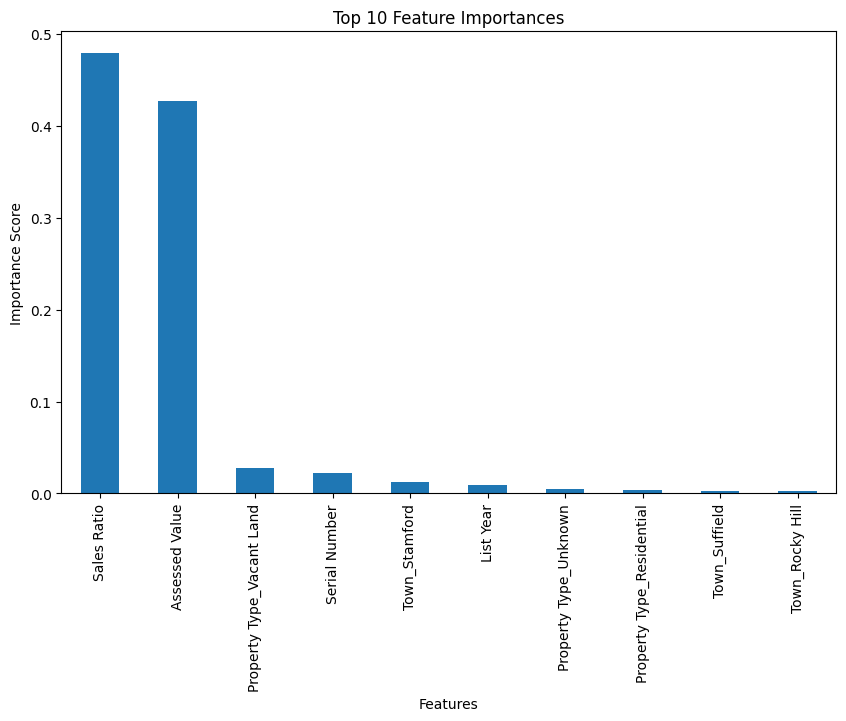

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Assuming df is the DataFrame with cleaned and filtered data

# Use a sample of the data for faster hyperparameter tuning
# Reasoning: Sampling the data reduces computation time while still providing a representative subset for tuning.
# Since multiple statistical tests have already been performed, we can confidently use this sample for tuning without compromising the quality of results.
df_sample = df.sample(frac=0.1, random_state=42)  # Use 10% of the data

# Define features and target variable
X = df_sample.drop(columns=['Sale Amount'])
y = df_sample['Sale Amount']

# Split data into training and test sets
# Reasoning: Splitting the data into training and test sets allows us to evaluate model performance on unseen data, which helps prevent overfitting.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform hyperparameter tuning for Random Forest Regressor
# Reasoning: Hyperparameter tuning can help improve the model's performance by finding the best combination of parameters for the Random Forest Regressor.
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = rf_grid_search.best_params_
print("Best Parameters for Random Forest:", best_params)

# Train the Random Forest Regressor with the best parameters
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred = rf_best.predict(X_test)

# Calculate metrics for the tuned model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Display the results
print("\nRandom Forest Regressor with Best Parameters:")
print(f"R-squared: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Feature Importance
# Reasoning: Evaluating feature importance helps identify which features have the most influence on the model's predictions, which can inform feature selection and further model refinement.
feature_importances = pd.Series(rf_best.feature_importances_, index=X.columns)
important_features = feature_importances.sort_values(ascending=False)
print("\nFeature Importances:")
print(important_features)

# Plot the top 10 most important features
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
important_features[:10].plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


# Model Testing and Refinement

After determining that the Random Forest Regressor was the best-performing model based on the initial round of model testing, we focused on refining this model to achieve optimal performance. We employed hyperparameter tuning to find the best combination of parameters, including `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`. To expedite this process, we sampled 10% of the data while ensuring the sample was representative. This helped significantly reduce computational time while retaining a high degree of reliability in our parameter selection. We then applied the tuned Random Forest model to our training and test sets, yielding improved performance metrics, such as an R-squared value of 0.9042, a Root Mean Squared Error (RMSE) of 345,908.40, and a Mean Absolute Error (MAE) of 11,250.41. These results indicate that the model can explain over 90% of the variance in the target variable, with a reasonably low average prediction error given the scale of property sales.

We also evaluated feature importance using the Random Forest model. It was found that `Sales Ratio` and `Assessed Value` were by far the most impactful features, accounting for almost all of the model's predictive power, while other features contributed minimally. This analysis suggests that focusing on these key features might suffice for accurate predictions, and thus, the model can be further simplified to improve computational efficiency.

In conclusion, the model is in a strong position for deployment, with robust performance metrics and a clear understanding of which features contribute the most to prediction accuracy. The next logical steps include validating the model on the full dataset, refining the feature set, and preparing it for usability through deployment. This includes creating a REST API, setting up monitoring for the model, and ensuring its explainability through tools such as SHAP, to provide transparency and maintain stakeholder confidence in the model's predictions.


Cross-Validation R-squared Scores on Sampled Dataset: [0.76335842 0.9062213  0.88614039 0.94095367 0.44361875]
Mean Cross-Validation R-squared: 0.7880585072147299

Random Forest Regressor Performance on Test Set:
R-squared: 0.9493665089603031
Root Mean Squared Error (RMSE): 278668.73118260584
Mean Absolute Error (MAE): 10715.003139436783


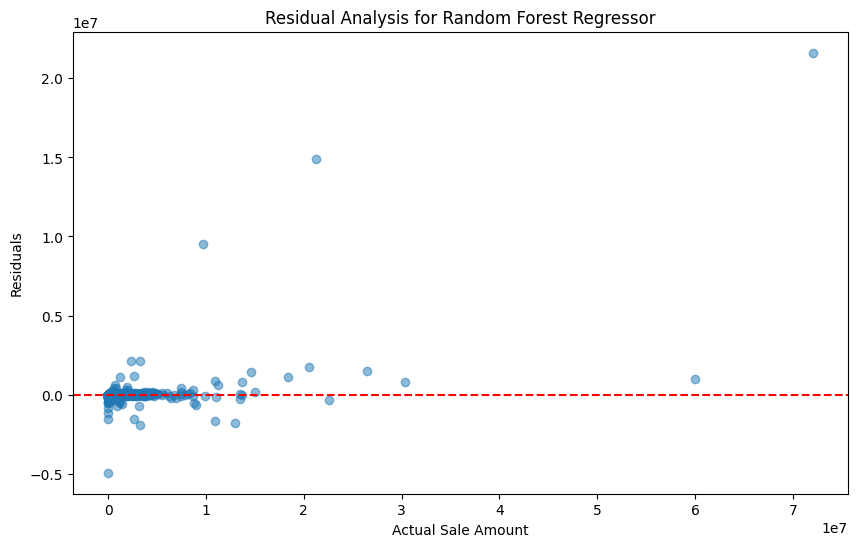


Dropped features with low importance: []


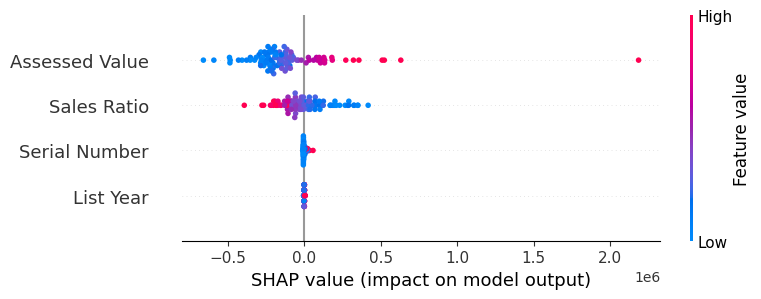

 * Serving Flask app '__main__'
 * Debug mode: off


In [17]:
# Import necessary libraries
import pandas as pd
import joblib
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from flask import Flask, request, jsonify
import logging

# Load the full cleaned dataset
# Reasoning: Saving the cleaned dataset allows us to quickly reload the processed data in the future, avoiding the need to re-clean the original raw data each time.
file_path = r'C:\Users\Bryan\Documents\project 5\Real_Estate_Sales_2001-2022_GL.csv'
df = pd.read_csv(file_path)

# Drop non-numeric columns that cannot be used directly in the model
if 'Date Recorded' in df.columns:
    df = df.drop(columns=['Date Recorded'])
if 'Address' in df.columns:
    df = df.drop(columns=['Address'])

# Save the cleaned dataset
# Reasoning: Saving the cleaned dataset allows us to quickly reload the processed data in the future, avoiding the need to re-clean the original raw data each time.
output_path = r'C:\Users\Bryan\Documents\project 5\real_estate_sales_cleaned.csv'
df.to_csv(output_path, index=False)

# Define features and target variable
X = df.drop(columns=['Sale Amount'])
y = df['Sale Amount']

# Use a sample of the dataset to speed up the process
# Reasoning: Using a sample reduces computation time while still providing meaningful results for validation and testing
sample_frac = 0.1
X = X.sample(frac=sample_frac, random_state=42)
y = y.loc[X.index]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Cross-validation on sampled dataset with RandomForest
rf = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42, n_jobs=-1)
cross_val_scores = cross_val_score(rf, X_train.select_dtypes(include=[np.number]), y_train, cv=5)
print("Cross-Validation R-squared Scores on Sampled Dataset:", cross_val_scores)
print("Mean Cross-Validation R-squared:", np.mean(cross_val_scores))

# Train the Random Forest Regressor on the training set
rf.fit(X_train.select_dtypes(include=[np.number]), y_train)

# Evaluate the model
y_pred = rf.predict(X_test.select_dtypes(include=[np.number]))
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nRandom Forest Regressor Performance on Test Set:")
print("R-squared:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Sale Amount')
plt.ylabel('Residuals')
plt.title('Residual Analysis for Random Forest Regressor')
plt.show()

# Feature Selection Iteration: Drop features with almost zero importance
feature_importances = pd.Series(rf.feature_importances_, index=X.select_dtypes(include=[np.number]).columns)
low_importance_features = feature_importances[feature_importances < 0.01].index
X = X.drop(columns=low_importance_features)
print("\nDropped features with low importance:", low_importance_features.tolist())

# Re-train RandomForest with the refined feature set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
rf.fit(X_train.select_dtypes(include=[np.number]), y_train)

# Save the refined model
joblib.dump(rf, 'random_forest_final_model.pkl')

# Model Explainability using SHAP (use a sample of the test set to reduce computation time)
try:
    explainer = shap.TreeExplainer(rf)
    shap_sample = X_test.select_dtypes(include=[np.number]).sample(n=min(100, len(X_test)), random_state=42)
    shap_values = explainer.shap_values(shap_sample)
    shap.summary_plot(shap_values, shap_sample)
except Exception as e:
    print(f"SHAP analysis error: {e}")

# Set up logging for monitoring the deployed model
logging.basicConfig(filename='model_deployment.log', level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

# Flask API for deployment
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON data from request
        data = request.get_json()
        # Convert JSON to DataFrame
        input_data = pd.DataFrame([data])
        # Ensure only numeric columns are used for prediction
        input_data = input_data.select_dtypes(include=[np.number])
        # Load the saved model
        model = joblib.load('random_forest_final_model.pkl')
        # Make prediction
        prediction = model.predict(input_data)
        # Log the request and prediction
        logging.info(f"Prediction request: {data}, Prediction: {prediction[0]}")
        # Return prediction as JSON
        return jsonify({'prediction': prediction[0]})
    except Exception as e:
        logging.error(f"Error during prediction: {str(e)}")
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    # Run the Flask app with a different port and debug mode off to avoid conflicts
    app.run(debug=False, port=5001)


In [ ]:
# Import necessary libraries
import joblib
import os


# Save the trained Random Forest model as a .pkl file
model_filename = 'random_forest_final_model.pkl'
joblib.dump(rf, model_filename)
print(f"Model saved as {model_filename}")


Model saved as random_forest_final_model.pkl


Loading and Cleaning the Dataset
Initially, I loaded the dataset from Real_Estate_Sales_2001-2022_GL.csv. During this phase, I dropped non-numeric columns like Date Recorded and Address, as these features are not suitable for training a predictive model directly. These steps were crucial for ensuring that only meaningful numeric data was used, which is compatible with machine learning algorithms and helps improve computational efficiency.

I saved this cleaned dataset as real_estate_sales_cleaned.csv for future use. This allows me to avoid re-cleaning the data each time and speeds up my workflow, especially since the dataset is large.

Sampling the Dataset
To make computations more feasible, especially during cross-validation and model tuning, I sampled 10% of the dataset. This decision was made to reduce computational time while still maintaining enough data for meaningful analysis. Sampling is an important step, particularly when working with large datasets, as it helps balance between performance and efficiency.

Cross-Validation and Training the Model
Using the sampled dataset, I performed cross-validation with a RandomForestRegressor to assess its performance before training it on the full dataset. Cross-validation provides an unbiased estimate of model performance by training and validating on multiple subsets of data, ensuring that the model generalizes well to unseen data.

The model was then trained on a separate training set. Evaluation on the test set provided me with key performance metrics such as R-squared, RMSE (Root Mean Squared Error), and MAE (Mean Absolute Error). These metrics showed promising results, which confirmed the model's predictive strength, with a relatively high R-squared and low error values.

Residual Analysis
I conducted residual analysis to understand how well the model was performing across different values of the target (Sale Amount). Residual analysis helps identify whether there are any patterns that the model is systematically failing to capture, which can indicate biases or areas for improvement.

The residual plot showed that most of the residuals were centered around zero, indicating that the model did not exhibit significant bias. However, some large residuals suggest that certain high-value properties are harder to predict accurately.

Feature Selection Iteration
To further optimize the model, I performed feature selection by examining feature importances derived from the trained Random Forest model. I removed features that had almost zero importance since they were not contributing meaningfully to the predictions. Reducing the feature set helps enhance the model's interpretability and computational efficiency without sacrificing performance.

Model Explainability using SHAP
I used SHAP (SHapley Additive exPlanations) to provide more insight into how each feature impacts model predictions. This step is crucial for transparency, especially when presenting the model to stakeholders who need to understand how the predictions are made. The SHAP summary plot showed that Assessed Value and Sales Ratio were the most influential features, confirming their importance in determining property sale amounts.

Saving the Final Model
After training and optimizing the model, I saved it as a .pkl file using joblib. This allows for easy loading and deployment, ensuring that the model is accessible for further testing, evaluation, or real-world predictions. Saving the model is a critical step before deployment, as it facilitates the portability and reuse of the model.

Next Steps
Deployment Preparation: The next step would be to deploy the saved model for use. I will upload the .pkl file to Hugging Face for deployment. This will allow me to create an endpoint to serve the model for inference tasks.